# 10 Minutes of Pandas - a bird-view of pandas liberay
Created By: Awais Haleem\
Date: 08-10-2023\
Email: awaishaleem20@gmail.com


In [141]:
# import pandas and numpy library
import numpy as np
import pandas as pd

## Basic data structures in pandas
Pandas provides two types of classes for handling data:

***Series***: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.\
***DataFrame***: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

## Object creation

Creating a Series by passing a list of values, letting pandas create a default RangeIndex.

In [142]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])  # series is one dimensional array with axis label
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns:



In [143]:
# dates will be used as index of our dataframe
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [144]:
# DF with dates keys and A B C D columns
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-05,0.262607,-1.145751,0.132777,-0.169319
2013-01-06,-0.111622,-0.459526,1.741467,1.198612


Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [145]:
# creating df with dictionary
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [146]:
# check data types of all columns
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## Viewing data

In [147]:
# see df head
df.head()   # first 5 rows

,A,B,C,D
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-05,0.262607,-1.145751,0.132777,-0.169319


In [148]:
# see tail
df.tail()   #last 5 rows

,A,B,C,D
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-05,0.262607,-1.145751,0.132777,-0.169319
2013-01-06,-0.111622,-0.459526,1.741467,1.198612


In [149]:
# see DF index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [150]:
# see DF columns/ lables
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [151]:
# see a NumPy representation of the DF without the index or column labels
df.to_numpy()

array([[-0.1131287 , -0.46384846, -1.04390196,  0.9266936 ],
       [-1.65063685,  0.23457714, -0.68769905,  0.55566767],
       [-1.84856033,  0.60111152, -0.91230877, -1.7824396 ],
       [ 0.48613888,  0.4003736 ,  0.22329395,  0.34464154],
       [ 0.26260652, -1.14575089,  0.13277722, -0.16931925],
       [-0.11162239, -0.45952568,  1.74146683,  1.19861174]])

In [152]:
# describe shows the quick summary of DF
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.495867,-0.138844,-0.091062,0.178976
std,0.999702,0.663334,1.043591,1.071125
min,-1.848560,-1.145751,-1.043902,-1.782440
25%,-1.266260,-0.462768,-0.856156,-0.040829
50%,-0.112376,-0.112474,-0.277461,0.450155
75%,0.169049,0.358924,0.200665,0.833937
max,0.486139,0.601112,1.741467,1.198612


In [153]:
# transposing a DF
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.113129,-1.650637,-1.848560,0.486139,0.262607,-0.111622
B,-0.463848,0.234577,0.601112,0.400374,-1.145751,-0.459526
C,-1.043902,-0.687699,-0.912309,0.223294,0.132777,1.741467
D,0.926694,0.555668,-1.782440,0.344642,-0.169319,1.198612


In [154]:
# Sort DF by an axis

df.sort_index(axis=1, ascending=False)  # sortin DF with column names


,D,C,B,A
2013-01-01,0.926694,-1.043902,-0.463848,-0.113129
2013-01-02,0.555668,-0.687699,0.234577,-1.650637
2013-01-03,-1.782440,-0.912309,0.601112,-1.848560
2013-01-04,0.344642,0.223294,0.400374,0.486139
2013-01-05,-0.169319,0.132777,-1.145751,0.262607
2013-01-06,1.198612,1.741467,-0.459526,-0.111622


In [155]:
df.sort_values(by="B")      # sorting DF with respect to values of "B" column

,A,B,C,D
2013-01-05,0.262607,-1.145751,0.132777,-0.169319
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694
2013-01-06,-0.111622,-0.459526,1.741467,1.198612
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440


## Selection

*Getitem* ([]):
For a DataFrame, passing a single label selects a columns and yields a Series equivalent to df.A:

In [156]:
df["A"] # select A column

2013-01-01   -0.113129
2013-01-02   -1.650637
2013-01-03   -1.848560
2013-01-04    0.486139
2013-01-05    0.262607
2013-01-06   -0.111622
Freq: D, Name: A, dtype: float64

In [157]:
# For a DataFrame, passing a slice : selects matching rows

df[0:3]     # slicing of first 3 rows

,A,B,C,D
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440


In [158]:
df["20130102":"20130104"]   # slicing from 20130102 to 20130104 index

,A,B,C,D
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440
2013-01-04,0.486139,0.400374,0.223294,0.344642


## Selection By Label

In [159]:
#Selecting a row matching a label:

df.loc[dates[0]]    # selecting the row having index of dates[0] date

A   -0.113129
B   -0.463848
C   -1.043902
D    0.926694
Name: 2013-01-01 00:00:00, dtype: float64

In [160]:
# selecting all rows and A & B columns
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.113129,-0.463848
2013-01-02,-1.650637,0.234577
2013-01-03,-1.848560,0.601112
2013-01-04,0.486139,0.400374
2013-01-05,0.262607,-1.145751
2013-01-06,-0.111622,-0.459526


In [161]:
# For label slicing, both endpoints are included
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.650637,0.234577
2013-01-03,-1.848560,0.601112
2013-01-04,0.486139,0.400374


In [162]:
# Selecting a single row and column label returns a scalar
df.loc[dates[0], "A"]   # returns the value of A in dates[0] row

-0.11312869697029272

In [163]:
# another way to select a value or scaler
df.at[dates[0], "A"]

-0.11312869697029272

## Selection by position

In [164]:
df.iloc[3] # selection 4th row

A    0.486139
B    0.400374
C    0.223294
D    0.344642
Name: 2013-01-04 00:00:00, dtype: float64

In [165]:
df.iloc[3:5, 0:2]   # slice of firs to columns and 3 & 4 rows

,A,B
2013-01-04,0.486139,0.400374
2013-01-05,0.262607,-1.145751


In [166]:
df.iloc[[1, 2, 4], [0, 2]] # 2nd, third and fifth row & first and third column


,A,C
2013-01-02,-1.650637,-0.687699
2013-01-03,-1.848560,-0.912309
2013-01-05,0.262607,0.132777


In [167]:
df.iloc[1:3, :] # second and third rows, all columns

,A,B,C,D
2013-01-02,-1.650637,0.234577,-0.687699,0.555668
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440


In [168]:
df.iloc[:, 1:3] # all columns, 2nd and third rows

,B,C
2013-01-01,-0.463848,-1.043902
2013-01-02,0.234577,-0.687699
2013-01-03,0.601112,-0.912309
2013-01-04,0.400374,0.223294
2013-01-05,-1.145751,0.132777
2013-01-06,-0.459526,1.741467


In [169]:
df.iloc[1, 1]   # 2nd column value in 2nd row

0.23457714106441122

In [170]:
df.iat[1, 1]    # 2nd column value in 2nd row

0.23457714106441122

## Boolean indexing

In [171]:
df[df["A"] > 0] # all values of A who are above 0

,A,B,C,D
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-05,0.262607,-1.145751,0.132777,-0.169319


In [172]:
df[df > 0]  # all values of DF who are above 0

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.926694
2013-01-02,NaN,0.234577,NaN,0.555668
2013-01-03,NaN,0.601112,NaN,NaN
2013-01-04,0.486139,0.400374,0.223294,0.344642
2013-01-05,0.262607,NaN,0.132777,NaN
2013-01-06,NaN,NaN,1.741467,1.198612


In [173]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694,one
2013-01-02,-1.650637,0.234577,-0.687699,0.555668,one
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440,two
2013-01-04,0.486139,0.400374,0.223294,0.344642,three
2013-01-05,0.262607,-1.145751,0.132777,-0.169319,four
2013-01-06,-0.111622,-0.459526,1.741467,1.198612,three


In [174]:
# Using isin() method for filtering
df2[df2["E"].isin(["two", "four"])] # all two and four values of E

,A,B,C,D,E
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440,two
2013-01-05,0.262607,-1.145751,0.132777,-0.169319,four


# Setting

Setting a new column automatically aligns the data by the indexes

In [175]:
# define a sereis with date indeces
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [176]:
# adding a column F in DF and values of F is s1
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.113129,-0.463848,-1.043902,0.926694,NaN
2013-01-02,-1.650637,0.234577,-0.687699,0.555668,1.0
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440,2.0
2013-01-04,0.486139,0.400374,0.223294,0.344642,3.0
2013-01-05,0.262607,-1.145751,0.132777,-0.169319,4.0
2013-01-06,-0.111622,-0.459526,1.741467,1.198612,5.0


In [177]:
# Setting values by label
df.at[dates[0], "A"] = 0    # setting the first value of A to 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.463848,-1.043902,0.926694,NaN
2013-01-02,-1.650637,0.234577,-0.687699,0.555668,1.0
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440,2.0
2013-01-04,0.486139,0.400374,0.223294,0.344642,3.0
2013-01-05,0.262607,-1.145751,0.132777,-0.169319,4.0
2013-01-06,-0.111622,-0.459526,1.741467,1.198612,5.0


In [178]:
# Setting values by position
df.iat[0, 1] = 0    # setting first value of B to zero
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.043902,0.926694,NaN
2013-01-02,-1.650637,0.234577,-0.687699,0.555668,1.0
2013-01-03,-1.848560,0.601112,-0.912309,-1.782440,2.0
2013-01-04,0.486139,0.400374,0.223294,0.344642,3.0
2013-01-05,0.262607,-1.145751,0.132777,-0.169319,4.0
2013-01-06,-0.111622,-0.459526,1.741467,1.198612,5.0


In [179]:
# Setting by assigning with a NumPy array
df.loc[:, "D"] = np.array([5] * len(df))    # setting all values of D to 5
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.043902,5.0,NaN
2013-01-02,-1.650637,0.234577,-0.687699,5.0,1.0
2013-01-03,-1.848560,0.601112,-0.912309,5.0,2.0
2013-01-04,0.486139,0.400374,0.223294,5.0,3.0
2013-01-05,0.262607,-1.145751,0.132777,5.0,4.0
2013-01-06,-0.111622,-0.459526,1.741467,5.0,5.0


In [180]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2 # converting all positive values to negitive
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.043902,-5.0,NaN
2013-01-02,-1.650637,-0.234577,-0.687699,-5.0,-1.0
2013-01-03,-1.848560,-0.601112,-0.912309,-5.0,-2.0
2013-01-04,-0.486139,-0.400374,-0.223294,-5.0,-3.0
2013-01-05,-0.262607,-1.145751,-0.132777,-5.0,-4.0
2013-01-06,-0.111622,-0.459526,-1.741467,-5.0,-5.0


## Missing Data

For NumPy data types, np.nan represents missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [181]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ["E"]) # takinge first 4 entries anda adding E with nan values
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.043902,5.0,NaN,NaN
2013-01-02,-1.650637,0.234577,-0.687699,5.0,1.0,NaN
2013-01-03,-1.848560,0.601112,-0.912309,5.0,2.0,NaN
2013-01-04,0.486139,0.400374,0.223294,5.0,3.0,NaN


In [182]:
# changign first 2 entries of E to 1
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.043902,5.0,NaN,1.0
2013-01-02,-1.650637,0.234577,-0.687699,5.0,1.0,1.0
2013-01-03,-1.848560,0.601112,-0.912309,5.0,2.0,NaN
2013-01-04,0.486139,0.400374,0.223294,5.0,3.0,NaN


In [183]:
# DataFrame.dropna() drops any rows that have missing data
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-1.650637,0.234577,-0.687699,5.0,1.0,1.0


In [184]:
# DataFrame.fillna() fills missing data
df1.fillna(value=5)     # fill nan values with 5

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.043902,5.0,5.0,1.0
2013-01-02,-1.650637,0.234577,-0.687699,5.0,1.0,1.0
2013-01-03,-1.848560,0.601112,-0.912309,5.0,2.0,5.0
2013-01-04,0.486139,0.400374,0.223294,5.0,3.0,5.0


In [185]:
# isna() gets the boolean mask where values are nan
df1.isna()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [186]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations


## Stats

***imp***: Operations in general exclude missing data.

In [187]:
# calculate the mean of each column
df1.mean()

A   -0.753265
B    0.309016
C   -0.605154
D    5.000000
F    2.000000
E    1.000000
dtype: float64

In [188]:
# calulate the mean value for each row
df1.mean(axis=1)

2013-01-01    0.991220
2013-01-02    0.816040
2013-01-03    0.968048
2013-01-04    1.821961
Freq: D, dtype: float64

Operating with another Series or DataFrame with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with np.nan.

In [189]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [190]:
df.sub(s, axis="index") # subtractictin s with all cols of df
                        # it will fill nan for not mathing index

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.848560,-0.398888,-1.912309,4.0,1.0
2013-01-04,-2.513861,-2.599626,-2.776706,2.0,0.0
2013-01-05,-4.737393,-6.145751,-4.867223,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## User defined functions

DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.


In [191]:
df.agg(lambda x: np.mean(x) * 5.6)  # multiply 5.6 to mean of all values


A    -2.671269
B    -0.344600
C    -0.509947
D    28.000000
F    16.800000
dtype: float64

In [192]:
df.transform(lambda x: x * 101.2)   # multiply 101.2 to all values

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-105.642878,506.0,NaN
2013-01-02,-167.044450,23.739207,-69.595144,506.0,101.2
2013-01-03,-187.074305,60.832486,-92.325647,506.0,202.4
2013-01-04,49.197254,40.517809,22.597347,506.0,303.6
2013-01-05,26.575780,-115.949990,13.437055,506.0,404.8
2013-01-06,-11.296186,-46.503999,176.236444,506.0,506.0


## Value Counts

In [193]:
# make a series of random ints from 0-7 of 10 values
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    0
2    1
3    3
4    5
5    0
6    6
7    4
8    2
9    3
dtype: int64

In [194]:
# counts the no of occurences of a value
s.value_counts()

5    2
0    2
3    2
1    1
6    1
4    1
2    1
Name: count, dtype: int64

## String Methods


Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array

In [195]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()    # change lowercase to all string items

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
pandas provides various facilities for easily combining together Series` and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

## Concat

In [196]:
df = pd.DataFrame(np.random.randn(10, 4))   # df of (10, 4)
df

,0,1,2,3
0,0.984735,0.189836,-1.249019,-0.597106
1,-1.047036,-1.656158,-0.540717,-0.878667
2,-0.726672,0.458358,0.788967,-0.120461
3,0.226250,1.682374,-0.065123,1.331655
4,-0.602324,0.742881,-0.478157,-0.147222
5,0.724897,0.463588,-1.063166,0.178654
6,-0.882199,0.589653,-0.798221,0.899617
7,1.545759,0.403332,1.215612,0.865562
8,0.413899,-0.370509,-0.464618,0.864454
9,-0.879628,-1.007572,-2.022618,-0.483389


In [197]:
# break df into 3 pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]   # first piecs

,0,1,2,3
0,0.984735,0.189836,-1.249019,-0.597106
1,-1.047036,-1.656158,-0.540717,-0.878667
2,-0.726672,0.458358,0.788967,-0.120461


In [198]:
# Concatenating pandas objects together row-wise with concat()
pd.concat(pieces)   # join all pieces

,0,1,2,3
0,0.984735,0.189836,-1.249019,-0.597106
1,-1.047036,-1.656158,-0.540717,-0.878667
2,-0.726672,0.458358,0.788967,-0.120461
3,0.226250,1.682374,-0.065123,1.331655
4,-0.602324,0.742881,-0.478157,-0.147222
5,0.724897,0.463588,-1.063166,0.178654
6,-0.882199,0.589653,-0.798221,0.899617
7,1.545759,0.403332,1.215612,0.865562
8,0.413899,-0.370509,-0.464618,0.864454
9,-0.879628,-1.007572,-2.022618,-0.483389


## Join
***merge()*** enables SQL style join types along specific columns.

In [199]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [200]:
right

,key,rval
0,foo,4
1,foo,5


In [201]:
pd.merge(left=left, right=right, on="key")  # merge left and right on key label

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


merge() on unique keys

In [202]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [203]:
right

,key,rval
0,foo,4
1,bar,5


In [204]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [205]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.784923,-0.038609
1,bar,one,-0.023099,-0.744582
2,foo,two,-0.122007,0.254375
3,bar,three,-1.447329,0.107445
4,foo,two,0.852487,1.025577
5,bar,two,0.030372,-0.991755
6,foo,one,-0.348889,0.160385
7,foo,three,1.427824,0.632617


Grouping by a column label, selecting column labels, and then applying the sum() function to the resulting groups

In [206]:
# goup data by A column. and then select C and D and sum their values
df.groupby("A")[["C","D"]].sum()

,C,D
A,,
bar,-1.440056,-1.628892
foo,1.024492,2.034346


Grouping by multiple columns label forms MultiIndex.

In [207]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one    -0.023099  -0.744582    1
     three  -1.447329   0.107445    1
     two     0.030372  -0.991755    1
foo  one    -0.784923  -0.038609    1
            -0.348889   0.160385    1
     three   1.427824   0.632617    1
     two    -0.122007   0.254375    1
             0.852487   1.025577    1
Name: count, dtype: int64

In [208]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.023099 -0.744582
    three -1.447329  0.107445
    two    0.030372 -0.991755
foo one   -1.133812  0.121776
    three  1.427824  0.632617
    two    0.730480  1.279953

In [209]:
df.groupby(["A", "B"]).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

# Reshaping

## Stack

In [210]:
# define a 2d array
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
# make multi-index from 2d array
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# make data frame of (8, 2) with multi-index and A B columns
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df


A         B
first second                    
bar   one     0.342405  0.278465
      two     1.957545  0.115316
baz   one     0.262884 -0.276381
      two    -0.520270  0.080305
foo   one    -0.914816 -0.702644
      two    -1.182761  1.613943
qux   one    -2.010082  1.760327
      two    -1.461348 -0.752253

In [211]:
df2 = df[:4]    # take first 4 observations
df2

A         B
first second                    
bar   one     0.342405  0.278465
      two     1.957545  0.115316
baz   one     0.262884 -0.276381
      two    -0.520270  0.080305

The ***stack()*** method “compresses” a level in the DataFrame’s columns:

In [212]:
stacked = df2.stack(future_stack=True)

In [213]:
stacked

first  second   
bar    one     A    0.342405
               B    0.278465
       two     A    1.957545
               B    0.115316
baz    one     A    0.262884
               B   -0.276381
       two     A   -0.520270
               B    0.080305
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is ***unstack***(), which by default unstacks the last level:

In [214]:
stacked.unstack()   # unstack last level

A         B
first second                    
bar   one     0.342405  0.278465
      two     1.957545  0.115316
baz   one     0.262884 -0.276381
      two    -0.520270  0.080305

In [215]:
stacked.unstack(1)  # unstack 2nd level

second        one       two
first                      
bar   A  0.342405  1.957545
      B  0.278465  0.115316
baz   A  0.262884 -0.520270
      B -0.276381  0.080305

In [216]:
stacked.unstack(0)  # unstack first level

first          bar       baz
second                      
one    A  0.342405  0.262884
       B  0.278465 -0.276381
two    A  1.957545 -0.520270
       B  0.115316  0.080305

# Pivot tables

In [217]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.002391,0.812976
1,one,B,foo,1.420525,-0.323040
2,two,C,foo,0.441972,-0.186104
3,three,A,bar,0.465438,1.386872
4,one,B,bar,-0.677989,-0.046435
5,one,C,bar,-0.374767,0.856406
6,two,A,foo,-2.323096,-1.763512
7,three,B,foo,0.420401,-0.369513
8,one,C,foo,-0.170018,-0.788031
9,one,A,bar,1.103984,-1.005129


pivot_table() pivots a DataFrame specifying the values, index and columns

In [218]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A  1.103984 -0.002391
      B -0.677989  1.420525
      C -0.374767 -0.170018
three A  0.465438       NaN
      B       NaN  0.420401
      C  0.872978       NaN
two   A       NaN -2.323096
      B  0.651007       NaN
      C       NaN  0.441972

# Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [219]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [220]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    178
2012-01-01 00:00:01    145
2012-01-01 00:00:02    265
2012-01-01 00:00:03    442
2012-01-01 00:00:04    449
                      ... 
2012-01-01 00:01:35    242
2012-01-01 00:01:36    284
2012-01-01 00:01:37    467
2012-01-01 00:01:38    378
2012-01-01 00:01:39    317
Freq: S, Length: 100, dtype: int64

In [221]:
ts.resample("5Min").sum()

2012-01-01    25542
Freq: 5T, dtype: int64

Series.tz_localize() localizes a time series to a time zone:

In [222]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.310567
2012-03-07    0.049548
2012-03-08   -0.438343
2012-03-09   -0.798024
2012-03-10    1.049211
Freq: D, dtype: float64

In [223]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    1.310567
2012-03-07 00:00:00+00:00    0.049548
2012-03-08 00:00:00+00:00   -0.438343
2012-03-09 00:00:00+00:00   -0.798024
2012-03-10 00:00:00+00:00    1.049211
Freq: D, dtype: float64

***Series.tz_convert()*** converts a timezones aware time series to another time zone:

In [224]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.310567
2012-03-06 19:00:00-05:00    0.049548
2012-03-07 19:00:00-05:00   -0.438343
2012-03-08 19:00:00-05:00   -0.798024
2012-03-09 19:00:00-05:00    1.049211
Freq: D, dtype: float64

Adding a non-fixed duration (BusinessDay) to a time series:

In [225]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [226]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# Categoricals
pandas can include categorical data in a DataFrame

In [227]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [228]:
df.dtypes

id            int64
raw_grade    object
dtype: object

In [229]:
# Converting the raw grades to a categorical data type
df['grade'] = df['raw_grade'].astype("category")
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [230]:
# Rename the categories to more meaningful names:
new_categories = ["very good", "good", "very bad"]
df.grade = df.grade.cat.rename_categories(new_categories=new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [231]:
# Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default)
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Sorting is per order in the categories, not lexical order:



In [232]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [233]:
# Grouping by a categorical column with observed=False also shows empty categories
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [234]:
# We use the standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt
plt.close("all")    #The plt.close method is used to close a figure window

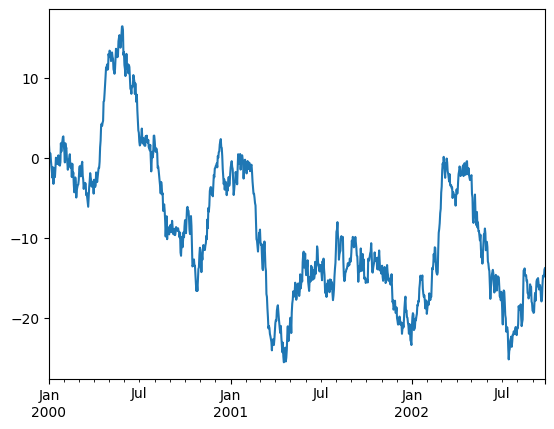

In [235]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

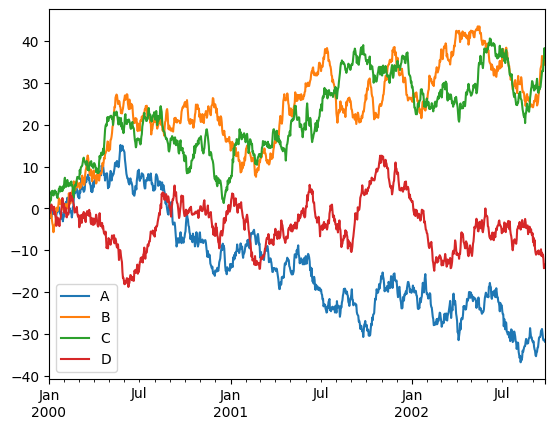

In [236]:
# plot() plots all columns

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

# Importing and exporting data

## CSV

In [237]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

In [238]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,3,4,3,0,0
1,1,3,0,3,1,0
2,2,2,3,1,2,0
3,3,0,1,0,3,3
4,4,1,2,4,4,1
5,5,0,2,1,4,3
6,6,4,0,0,2,0
7,7,3,2,2,0,1
8,8,3,1,0,1,0
9,9,2,3,1,3,0


# Excel
Reading and writing to Excel.



Writing to an excel file using DataFrame.to_excel():



In [239]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [240]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,3,4,3,0,0
1,1,3,0,3,1,0
2,2,2,3,1,2,0
3,3,0,1,0,3,3
4,4,1,2,4,4,1
5,5,0,2,1,4,3
6,6,4,0,0,2,0
7,7,3,2,2,0,1
8,8,3,1,0,1,0
9,9,2,3,1,3,0
